<a href="https://colab.research.google.com/github/Dwaynekiller/Data-Science-Learning/blob/main/Predict_Future_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align='center'><font size="5" color="#00000"><center><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"> Predict Future Sales </h1></center></font></div> 

# <H1><center>Prédiction des volumes de ventes des produits de grande consommation</center></H1>

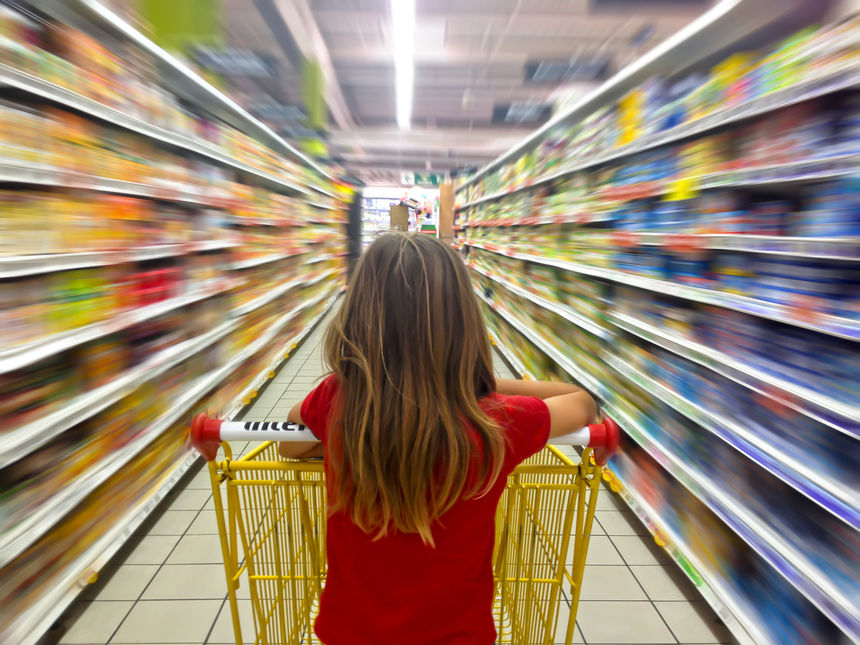

<div align='left'><font size="3" color="#000000"> In this competition you will work with a challenging time-series dataset, kindly provided by Intermarche and containing the daily sales of a selection of products, realized by a sample of  outlets over the year 2018.
</font></div>

<div align='left'><font size="3" color="#000000"> This challenge consists in providing a predictive model allowing to estimate the daily sales volumes realized by different points of sales for various mass consumption products (except fresh products or with variable weight).
</font></div>

<div align='left'><font size="3" color="#000000"> The model must be able <strong>to predict these volumes over a 3-month horizon at the daily grid.</strong></font></div>
<div align='left'><font size="3" color="#000000"> The algorithms will be evaluated against the volumes achieved in the first quarter of 2019.
</font></div>

<hr>   
<div class="alert alert-info" >
<font size="3">
For this challenge, submissions will be evaluated on the basis of error ($\text{RMSLE}$) (<em>Root Mean Squared Logarithmic Error</em>) :

$$\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\log(\hat{y}_i + 1) - \log(y_i + 1))^2}$$

<p>Where :</p>
<ul>
<li>\(n\) is the number of expected predictions (see details below)</li>
<li>\(\hat{y}_i\) is the sales volume prediction</li>
<li>\(y_i\) is the real sales volume</li>
</ul>
</font>
</div>
<hr>

<div align='left'>
    <font size="3" color="#000000"> 
        See more details <a href="https://challenge.datafactory-intermarche.fr/fr/challenge/1/details#tab_brief2">here</a>.
    </font>
</div>


## Data Description

<p><p>Daily sales history of 2500 FMCG products, made in 149 outlets of a hypermarket located in France in 2018.</p>

                                                                           
                                                                           
|**Files name**| | **Files description** |  | shape |
|--||--||--|
|ventes_2018.csv| | Daily sales file over 2018 (from 2018-01-01 to 2018-12-31).  |  | (32793018, 4) |
|points_de_vente.csv| | File containing the details of the points of sale.  |  | (149, 5) |
|nomenclature_produits.csv| | Product nomenclature elements (department, family and sub-family).  |  | (2500, 4) |
|prix_vente.csv| | Quarterly unit sales prices, by outlet and by product.  |  | (1185315, 5) |

<table>
    <thead>
        <h2>Data fields</h2>
    </thead>
    <tbody>
        <tr>
            <td>ID_PDV</td>
            <td>&nbsp;</td>
            <td>l'identifiant anonymisé du point de vente.</td>
        </tr>
        <tr>
            <td>ID_ARTC</td>
            <td>&nbsp;</td>
            <td>l'identifiant anonymisé de l'article (produit).</td>
        </tr>
        <tr>
            <td>DATE</td>
            <td>&nbsp;</td>
            <td>la date de vente au format aaaa-mm-jj</td>
        </tr>
        <tr>
            <td>QTE</td>
            <td>&nbsp;</td>
            <td>la quantité vendue</td>
        </tr>
        <tr>
            <td>ID_VOCT</td>
            <td>&nbsp;</td>
            <td>l'identifiant anonymisé de la vocation* du point de vente.</td>
        </tr>
        <tr>
            <td>ID_REGN</td>
            <td>&nbsp;</td>
            <td>l'identifiant de la région d'implantation du point de vente.</td>
        </tr>
        <tr>
            <td>NB_CAIS_GRP</td>
            <td>&nbsp;</td>
            <td>le groupe de nombre de caisses du point de vente. Cette variable est ordinale</td>
        </tr>
        <tr>
            <td>SURF_GRP</td>
            <td>&nbsp;</td>
            <td>le groupe de surface du point de vente. Cette variable est ordinale</td>
        </tr>
        <tr>
            <td>LB_VENT_RAYN</td>
            <td>&nbsp;</td>
            <td>le libellé du rayon auquel appartient le produit.</td>
        </tr>
        <tr>
            <td>LB_VENT_FAML</td>
            <td>&nbsp;</td>
            <td>le libellé de la famille du produit.</td>
        </tr>
        <tr>
            <td>LB_VENT_SOUS_FAML</td>
            <td>&nbsp;</td>
            <td>le libellé anonymisé de la sous-famille du produit</td>
        </tr>
        <tr>
            <td>ANNEE</td>
            <td>&nbsp;</td>
            <td>l'année</td>
        </tr>
        <tr>
            <td>TRIMESTRE</td>
            <td>&nbsp;</td>
            <td>Le trimestre</td>
        </tr>
        <tr>
            <td>PRIX_UNITAIRE</td>
            <td>&nbsp;</td>
            <td>la fourchette de prix unitaire.</td>
        </tr>
    </tbody>
</table>

###### *La vocation correspond au « type » du point de vente (Hyper, Super Alimentaire, Contact, ...).

<hr>   
<div class="alert alert-info" >
    <font size="3">Notes :
        <p>1 point de vente peut vendre 2500 articles par jour</p>
        <p>1 article peut être vendu par 149 point de vente par jour</p>
        <p>⇒ il s'agit d'une relation de type n:n qu'on doit scinder en 2 relations de type 1:n à l'aide d'une table de jonction qui dans notre cas d'étude est la table "prix de vente".</p>
        <center>ID_PDV (1:n) ⇒ Prix_de_Vente (ID_PDV, ID_ARTC) ⇐ (n:1)ID_ARTC</center>
    </font>
</div>
</hr>



## Data Preparation, Exploratory Analysis
<p>Following steps can be performed for data preparation, analysis and modelling to get the best predictions. The list might not be complete but have tried to list down as much as possible.</p>


In [ ]:
# to handle datasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

# importing LabelEncoder for converting categorical data, or text data, into numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

import xgboost as xgb
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# for the yeo-johnson transformation
import scipy.stats as stats

# for date manipulation
import datetime as dt

# to display all the columns of the dataframe in the notebook
#pd.pandas.set_option('display.max_columns', None)
#pd.options.display.max_rows = 1000
#pd.options.display.max_columns = 20
sns.set_theme(style="darkgrid")

#
import warnings
warnings.filterwarnings("ignore")

def analysedataframe(data):
    """
        this function show some information to analyze the dataframe
    """
    print('-----------Top-5 Records---------------')
    print(data.head())
    print('\n-----------Last-5 Records------------')
    print(data.tail())
    print('\n-----------Information---------------')
    print(data.info())
    print('\n-----------Data Types----------------')
    print(data.dtypes)
    print('\n-----------Missing value-------------')
    print(data.isnull().sum())
    print('\n----------Null value-----------------')
    print(data.isna().sum())
    print('\n----------Shape of Data--------------')
    print(data.shape)
    print('\n----------Check for nulls or duplicates------------------')
    print(data.duplicated().value_counts())
    print('\n----------Count distinct observations--------------------')    
    print(data.apply(lambda x : x.nunique()))
    # make a list of the variables that contain missing values
    vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
    # determine percentage of missing values (expressed as decimals)
    # and display the result ordered by % of missing data
    if len(vars_with_na) > 0:
        # plot
        data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
        plt.ylabel('Percentage of missing data')
        plt.axhline(y=0.90, color='r', linestyle='-')
        plt.axhline(y=0.80, color='g', linestyle='-')
    
        plt.show()
    else:
        print(f'\nThere is no list of the variables below that contain missing values:\n{data.columns}')

#    print('\n----------Generates descriptive statistics --------------')
#    print(data.describe().T)

#show pandas version
pd.__version__

'1.1.5'

### Etape 1 - Préparation des données : fusionner tous les fichiers csv dans un seul dataframe

##### 1 - chargement des données

In [ ]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
#!ls "/content/drive/MyDrive/challenge_intermarche"
pathfile = '/content/drive/MyDrive/challenge_intermarche'
fp_vente_2018 = "/".join([pathfile , 'ventes_2018.csv'])
fp_prix_vente =  "/".join([pathfile , 'prix_vente.csv'])
fp_points_de_vente =  "/".join([pathfile , 'points_de_vente.csv'])
fp_nomenclature_produits =  "/".join([pathfile , 'nomenclature_produits.csv'])
#df_vente_2018            = pd.read_csv(fp_vente_2018, index_col='DATE', parse_dates=True)
df_vente_2018            = pd.read_csv(fp_vente_2018)
df_prix_vente            = pd.read_csv(fp_prix_vente)
df_points_de_vente       = pd.read_csv(fp_points_de_vente)
df_nomenclature_produits = pd.read_csv(fp_nomenclature_produits)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
#df_vente_2018            = pd.read_csv('ventes_2018.csv')
#df_prix_vente            = pd.read_csv('prix_vente.csv')
#df_points_de_vente       = pd.read_csv('points_de_vente.csv')
#df_nomenclature_produits = pd.read_csv('nomenclature_produits.csv')

1.1 - Analyse du dataset "prix de ventes"

In [ ]:
analysedataframe(df_prix_vente)

-----------Top-5 Records---------------
   ID_PDV  ID_ARTC  ANNEE  TRIMESTRE     PRIX_UNITAIRE
0      44      968   2019          1  Entre 3 et 3.99€
1      44      639   2018          3  Entre 2 et 2.99€
2      44      574   2019          1    Moins de 0.99€
3      44      781   2018          3    Moins de 0.99€
4      44      543   2018          1  Entre 1 et 1.99€

-----------Last-5 Records------------
         ID_PDV  ID_ARTC  ANNEE  TRIMESTRE     PRIX_UNITAIRE
1185310       8      603   2018          4  Entre 3 et 3.99€
1185311       8     1073   2018          4  Entre 1 et 1.99€
1185312       8     2027   2018          3  Entre 2 et 2.99€
1185313       8     1489   2018          2  Entre 1 et 1.99€
1185314       8     1029   2018          3  Entre 1 et 1.99€

-----------Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185315 entries, 0 to 1185314
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         ---------

In [ ]:
"""
Création de la colonne PRIX_ARTC (prix d'un article) basé sur les données de la colonne PRIX_UNITAIRE
dans le dataframe prix de vente : df_prix_vente
"""
#df_prix_vente['PRIX_ARTC'] = 1.0 * df_prix_vente['PRIX_UNITAIRE'].apply(lambda x : x[-6:-1]).astype('float') - 0.5
df_prix_vente['PRIX_ARTC'] = df_prix_vente['PRIX_UNITAIRE'].str[-6:-1].astype('float') - 0.5

#suppression des colonnes prix unitaire
df_prix_vente = df_prix_vente.drop(columns=['PRIX_UNITAIRE'])
df_prix_vente.head()

,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_ARTC
0,44,968,2019,1,3.49
1,44,639,2018,3,2.49
2,44,574,2019,1,0.49
3,44,781,2018,3,0.49
4,44,543,2018,1,1.49


In [ ]:
#df_prix_vente[df_prix_vente['ANNEE'] == 2019].TRIMESTRE.value_counts()[:10]

1.2 - Analyse du dataset "point de ventes"

In [ ]:
analysedataframe(df_points_de_vente)

-----------Top-5 Records---------------
   ID_PDV ID_VOCT ID_REGN  NB_CAIS_GRP  SURF_GRP
0       1   VOC_1   RGN_1  NB_CAIS_G_1  SURF_G_1
1      10   VOC_1   RGN_4  NB_CAIS_G_1  SURF_G_2
2     100   VOC_4   RGN_7  NB_CAIS_G_4  SURF_G_3
3     101   VOC_4   RGN_7  NB_CAIS_G_2  SURF_G_3
4     102   VOC_4   RGN_7  NB_CAIS_G_3  SURF_G_3

-----------Last-5 Records------------
     ID_PDV ID_VOCT ID_REGN  NB_CAIS_GRP  SURF_GRP
144      95   VOC_4   RGN_6  NB_CAIS_G_3  SURF_G_4
145      96   VOC_4   RGN_6  NB_CAIS_G_4  SURF_G_5
146      97   VOC_4   RGN_6  NB_CAIS_G_5  SURF_G_5
147      98   VOC_4   RGN_6  NB_CAIS_G_2  SURF_G_2
148      99   VOC_4   RGN_6  NB_CAIS_G_3  SURF_G_2

-----------Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_PDV       149 non-null    int64 
 1   ID_VOCT      149 non-null    object
 2   ID_REGN  

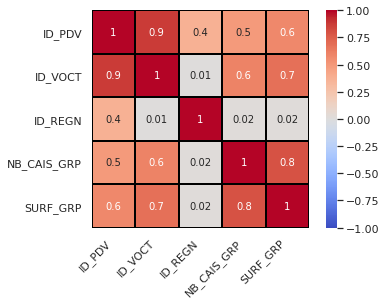

In [ ]:
"""
We apply One-Hot Encoding when:

1 - The categorical feature is not ordinal (like dog,cat,mouse).
2 - The number of categorical features is less so one-hot encoding can be effectively applied
3 - The values that are close to each other in the label encoding correspond to target values that aren't close (non - linear data).

We apply Label encoding when:

1 - The categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc).
2 - The number of categories is quite large as one-hot encoding can lead to high memory consumption. 
3 - We can come up with a label encoder that assigns close labels to similar categories: This leads to less splits in the tress hence reducing the execution time.

After saying that, we'll apply Label encoding to the categorical feature ordinal NB_CAIS_GRP and SURF_GRP: 
"""
#df_points_de_vente['NB_CAIS_GRP']= labelencoder.fit_transform(df_points_de_vente['NB_CAIS_GRP']) 
#df_points_de_vente['SURF_GRP']= labelencoder.fit_transform(df_points_de_vente['SURF_GRP'])

#modifications des colonnes catégoriques en valeur numérique
df_points_de_vente['NB_CAIS_GRP'] = df_points_de_vente["NB_CAIS_GRP"].str[-1].astype(int)
df_points_de_vente['SURF_GRP'] = df_points_de_vente["SURF_GRP"].str[-1].astype(int)
df_points_de_vente['ID_VOCT'] = df_points_de_vente['ID_VOCT'].str[-1].astype(int)
df_points_de_vente['ID_REGN'] = df_points_de_vente['ID_REGN'].str[-1].astype(int)

#pd.get_dummies(df_points_de_vente, columns=['ID_VOCT','ID_REGN'])
#df_points_de_vente.head()

#matrix de correlation entre les variables ID_PDV, ID_VOCT, ID_REGN, NB_CAIS_GRP, SURF_GRP
corr = df_points_de_vente.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    linewidths=1, linecolor='black',
    annot=True, fmt='.1g',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

1.3 - Analyse du dataset "nomenclature des produits"

In [ ]:
analysedataframe(df_nomenclature_produits)

-----------Top-5 Records---------------
   ID_ARTC  ...                        LB_VENT_SOUS_FAML
0      905  ...                  ULTRA FRAIS - SS-FAML 2
1      477  ...  BOISSONS GAZEUSES ET PLATES - SS-FAML 6
2      863  ...             BIERES ET CIDRES - SS-FAML 2
3     1741  ...             CAFES / CHICOREE - SS-FAML 2
4      983  ...                   FROMAGE LS - SS-FAML 2

[5 rows x 4 columns]

-----------Last-5 Records------------
      ID_ARTC  ...               LB_VENT_SOUS_FAML
2495      370  ...  ACCESSOIRE / GADGET DE CUISINE
2496      308  ...          FROMAGE LS - SS-FAML 1
2497     2467  ...   ACCESSOIRES COIFFANT/TOILETTE
2498      540  ...         TRAITEUR LS - SS-FAML 7
2499      631  ...         BISCUITERIE - SS-FAML 1

[5 rows x 4 columns]

-----------Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             -------------

1.4 - Analyse du dataset "ventes 2018"

In [ ]:
analysedataframe(df_vente_2018)

-----------Top-5 Records---------------
   ID_PDV  ID_ARTC        DATE  QTE
0     102      398  2018-05-14    3
1     102     2273  2018-05-14    1
2       5     1345  2018-05-14    1
3      87      290  2018-05-14    9
4     118        7  2018-05-14   15

-----------Last-5 Records------------
          ID_PDV  ID_ARTC        DATE  QTE
32793013     142     1100  2018-11-16    1
32793014      50      474  2018-11-16    1
32793015      35     1390  2018-11-16    1
32793016      59     1783  2018-11-16    1
32793017      52      646  2018-11-16    1

-----------Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32793018 entries, 0 to 32793017
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   ID_PDV   int64 
 1   ID_ARTC  int64 
 2   DATE     object
 3   QTE      int64 
dtypes: int64(3), object(1)
memory usage: 1000.8+ MB
None

-----------Data Types----------------
ID_PDV      int64
ID_ARTC     int64
DATE       object
QTE         int64

In [ ]:
#Convertir la colonne DATE en type datetime, le paramètre errors pour valeur coerce signifie
#qu'en cas d'erreur dans la conversion vers un objet datetime, on aura en sorite NaN à la place 
#des valeurs non converties
df_vente_2018['DATE'] = pd.to_datetime(df_vente_2018['DATE'], errors = 'coerce')

#ajout de colonne week day, année, mois, jour, trimestre dans le dataframe : df
df_vente_2018['ANNEE'] = df_vente_2018["DATE"].dt.year
df_vente_2018['TRIMESTRE'] = df_vente_2018["DATE"].dt.quarter

#ordonné les colonnes du dataframe df_vente_2018
df_vente_2018 = df_vente_2018.reindex(columns=['DATE','ANNEE','TRIMESTRE','ID_PDV','ID_ARTC','QTE'])
df_vente_2018.head()

,DATE,ANNEE,TRIMESTRE,ID_PDV,ID_ARTC,QTE
0,2018-05-14,2018,2,102,398,3
1,2018-05-14,2018,2,102,2273,1
2,2018-05-14,2018,2,5,1345,1
3,2018-05-14,2018,2,87,290,9
4,2018-05-14,2018,2,118,7,15


##### 2 - fusion des dataframe

2.1 - fusion point de vente et prix de vente

In [ ]:
print('the dimension of the dataframe df_prix_vente is : ', df_prix_vente.shape)
print('the dimension of the dataframe df_points_de_vente is : ', df_points_de_vente.shape)
print(f'the dimension of the merged dataframe should be ({df_prix_vente.shape[0]}, {df_prix_vente.shape[1] + df_points_de_vente.shape[1] - 1})') 

the dimension of the dataframe df_prix_vente is :  (1185315, 5)
the dimension of the dataframe df_points_de_vente is :  (149, 5)
the dimension of the merged dataframe should be (1185315, 9)


In [ ]:
# assembler les dataframe df_prix_vente_point_de_vente et df_nomenclature_produits
df_prix_vente_point_de_vente = pd.merge(df_prix_vente,df_points_de_vente, on=['ID_PDV'], how='inner')
print('dimensions du dataframe df_prix_vente_point_de_vente      :\n',df_prix_vente_point_de_vente.shape)
df_prix_vente_point_de_vente.head()

dimensions du dataframe df_prix_vente_point_de_vente      :
 (1185315, 9)


,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_ARTC,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP
0,44,968,2019,1,3.49,4,1,5,4
1,44,639,2018,3,2.49,4,1,5,4
2,44,574,2019,1,0.49,4,1,5,4
3,44,781,2018,3,0.49,4,1,5,4
4,44,543,2018,1,1.49,4,1,5,4


2.2 - fusion nomenclature des articles et prix de vente

In [ ]:
print('the dimension of the dataframe df_prix_vente_point_de_vente is : ', df_prix_vente_point_de_vente.shape)
print('the dimension of the dataframe df_nomenclature_produits is : ', df_nomenclature_produits.shape)
print(f'the dimension of the merged dataframe should be ({df_prix_vente_point_de_vente.shape[0]}, {df_prix_vente_point_de_vente.shape[1] + df_nomenclature_produits.shape[1] - 1})') 

the dimension of the dataframe df_prix_vente_point_de_vente is :  (1185315, 9)
the dimension of the dataframe df_nomenclature_produits is :  (2500, 4)
the dimension of the merged dataframe should be (1185315, 12)


In [ ]:
# assembler les dataframe df_prix_vente_point_de_vente et df_nomenclature_produits
df_prix_vente_point_de_vente_nomenclature_produits = pd.merge(df_prix_vente_point_de_vente,df_nomenclature_produits, on=['ID_ARTC'], how='inner')
print('dimensions du dataframe df_prix_vente_point_de_vente_nomenclature_produits      :\n',df_prix_vente_point_de_vente_nomenclature_produits.shape)
df_prix_vente_point_de_vente_nomenclature_produits.head()

dimensions du dataframe df_prix_vente_point_de_vente_nomenclature_produits      :
 (1185315, 12)


,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_ARTC,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,LB_VENT_RAYN,LB_VENT_FAML,LB_VENT_SOUS_FAML
0,44,968,2019,1,3.49,4,1,5,4,SURGELES,SURGELES SUCRE,SURGELES SUCRE - SS-FAML 4
1,44,968,2018,3,3.49,4,1,5,4,SURGELES,SURGELES SUCRE,SURGELES SUCRE - SS-FAML 4
2,44,968,2018,2,3.49,4,1,5,4,SURGELES,SURGELES SUCRE,SURGELES SUCRE - SS-FAML 4
3,44,968,2018,1,3.49,4,1,5,4,SURGELES,SURGELES SUCRE,SURGELES SUCRE - SS-FAML 4
4,44,968,2018,4,3.49,4,1,5,4,SURGELES,SURGELES SUCRE,SURGELES SUCRE - SS-FAML 4


In [ ]:
# séparé les prix de ventes en 2 dataframe par année 2018 et 2019
df_prix_vente_2018 = df_prix_vente[df_prix_vente['ANNEE'] == 2018]
df_prix_vente_2019 = df_prix_vente[df_prix_vente['ANNEE'] == 2019]

In [ ]:
print('the dimension of the dataframe df_vente_2018 is : ', df_vente_2018.shape)
print('the dimension of the dataframe df_prix_vente_point_de_vente_nomenclature_produits is : ', df_prix_vente_point_de_vente_nomenclature_produits.shape)
print(f'the dimension of the merged dataframe should be ({df_vente_2018.shape[0]}, {df_vente_2018.shape[1] + df_prix_vente_point_de_vente_nomenclature_produits.shape[1] - 4})') 

the dimension of the dataframe df_vente_2018 is :  (32793018, 6)
the dimension of the dataframe df_prix_vente_point_de_vente_nomenclature_produits is :  (1185315, 12)
the dimension of the merged dataframe should be (32793018, 14)


In [ ]:
# assembler les dataframe df_2018 et df_prix_vente_point_de_vente_nomenclature_produits
df_2018 = df_vente_2018.copy()
df_merge = pd.merge(df_2018,df_prix_vente_point_de_vente_nomenclature_produits, on=['ANNEE', 'TRIMESTRE', 'ID_PDV', 'ID_ARTC'], how='inner')
print('\nAffichage des 5 premières ligne du dataframe assemblé :')
df_merge.head()


Affichage des 5 premières ligne du dataframe assemblé :


,DATE,ANNEE,TRIMESTRE,ID_PDV,ID_ARTC,QTE,PRIX_ARTC,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,LB_VENT_RAYN,LB_VENT_FAML,LB_VENT_SOUS_FAML
0,2018-05-14,2018,2,102,398,3,2.49,4,7,3,3,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 3
1,2018-05-02,2018,2,102,398,7,2.49,4,7,3,3,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 3
2,2018-05-16,2018,2,102,398,6,2.49,4,7,3,3,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 3
3,2018-05-03,2018,2,102,398,7,2.49,4,7,3,3,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 3
4,2018-05-22,2018,2,102,398,9,2.49,4,7,3,3,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 3


In [ ]:
analysedataframe(df_merge)

-----------Top-5 Records---------------
        DATE  ANNEE  ...  LB_VENT_FAML       LB_VENT_SOUS_FAML
0 2018-05-14   2018  ...    FROMAGE LS  FROMAGE LS - SS-FAML 3
1 2018-05-02   2018  ...    FROMAGE LS  FROMAGE LS - SS-FAML 3
2 2018-05-16   2018  ...    FROMAGE LS  FROMAGE LS - SS-FAML 3
3 2018-05-03   2018  ...    FROMAGE LS  FROMAGE LS - SS-FAML 3
4 2018-05-22   2018  ...    FROMAGE LS  FROMAGE LS - SS-FAML 3

[5 rows x 14 columns]

-----------Last-5 Records------------
               DATE  ...                   LB_VENT_SOUS_FAML
32793013 2018-08-25  ...            BISCUITERIE - SS-FAML 11
32793014 2018-06-22  ...  DEVANT DE CAISSE (DDC) - SS-FAML 1
32793015 2018-03-10  ...    CONSERVES DE VIANDES - SS-FAML 3
32793016 2018-03-10  ...                 POTAGES - SS-FAML 2
32793017 2018-01-13  ...           PARAPHARMACIE - SS-FAML 3

[5 rows x 14 columns]

-----------Information---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32793018 entries, 0 to 32793017
Data colum

### Etape 2 - Analyses des données

##### 1 - Target = QTE

In [ ]:
df_merge['MOIS'] = df_merge["DATE"].dt.month
df_merge['JOUR'] = df_merge["DATE"].dt.day
df_merge["WEEKDAY"] = df_merge["DATE"].dt.day_name()

In [ ]:
# plot count item sale QTE vs month in which it was sold
df = df_merge.groupby(['MOIS'])['QTE'].sum()
#df = df_merge.groupby(['MOIS']).agg({'QTE': 'count'})
#plt.figure(figsize = (10,6))
plt.ticklabel_format(style = 'plain')
df.plot()
plt.ylabel('Qté vendu')
plt.xlabel('Mois')
plt.show()

In [ ]:
# plot count item sale QTE vs day in which it was sold
#df = df_merge.groupby(['MOIS','JOUR'])['QTE'].sum()
df = df_merge.groupby(['MOIS'])['QTE'].sum().reset_index()
#df = df_merge.groupby(['MOIS']).agg({'QTE': 'count'})
plt.figure(figsize = (10,5))
plt.ticklabel_format(style = 'plain')
df.plot()
plt.ylabel('Qté vendu')
plt.xlabel('Jour')
plt.show()

In [ ]:
df_merge.groupby(['MOIS','JOUR'])['QTE'].agg('count').reset_index()